In [7]:

#%matplotlib inline
%matplotlib notebook


import numpy as np
import pylab as plt
import scipy.optimize as opt
from scipy.integrate import quad

spirou_clight = 299792458
spirou_parsec = 3.08567758e16
spirou_hubble = 70
spirou_dhubble = spirou_clight / spirou_hubble

plt.close()

<IPython.core.display.Javascript object>


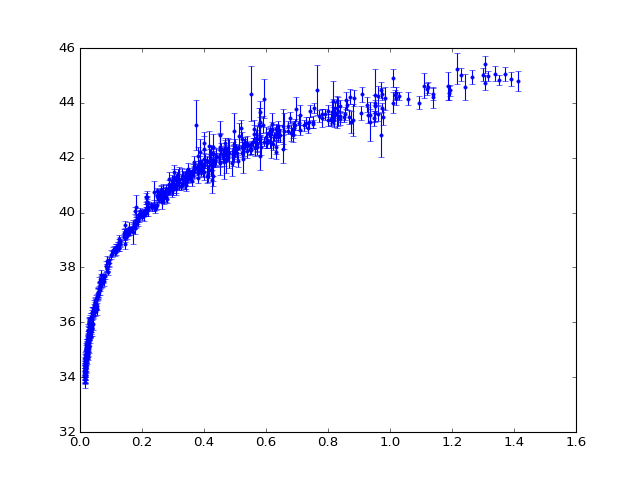

In [8]:
plt.close()
data = np.loadtxt('../data/supernovae.data')
z = data[:,0]
my = data[:,1]
me = data[:,2]

plt.errorbar(z,my,me,fmt='b.')

def lumi(z,omega_m):
        aux = quad(d_lumi,0,z,args=(omega_m))
        result = (1.0 + z) * aux[0]
        return(spirou_dhubble * result)

def d_lumi(x,omega_m, w=-1.0):
        omega_l = 1.0 - omega_m
        #w = -1.0
        hubble = np.sqrt(omega_m * (1.0 + x)**3 + omega_l * (1.0 + x)**(3.0 * (1.0 + w)))
        result = 1.0 / hubble
        return(result)

def mu(z,omega_m,w=-1.0):
        aux = lumi(z,omega_m)
        result = 5.0 * np.log10(aux) + 10
        return(result)

vmu = np.vectorize(mu)

<IPython.core.display.Javascript object>


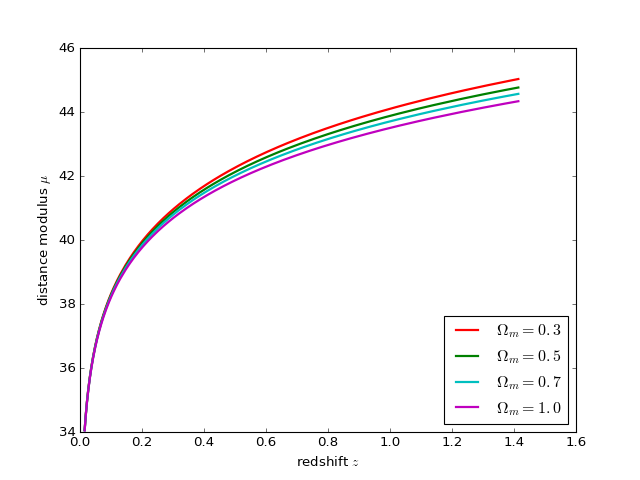

In [9]:
plt.close()
omega_m = 0.3
mu_try = vmu(z,omega_m)
plt.plot(z,mu_try,'r-',label='$\Omega_m=0.3$',linewidth=2)

omega_m = 0.5
mu_try = vmu(z,omega_m)
plt.plot(z,mu_try,'g-',label='$\Omega_m=0.5$',linewidth=2)

omega_m = 0.7
mu_try = vmu(z,omega_m)
plt.plot(z,mu_try,'c-',label='$\Omega_m=0.7$',linewidth=2)

omega_m = 1.0
mu_try = vmu(z,omega_m)
plt.plot(z,mu_try,'m-',label='$\Omega_m=1.0$',linewidth=2)

plt.legend(loc='lower right')
plt.xlim([0.0,1.6])
plt.xlabel('redshift $z$')
plt.ylabel('distance modulus $\mu$')
plt.show()

<IPython.core.display.Javascript object>


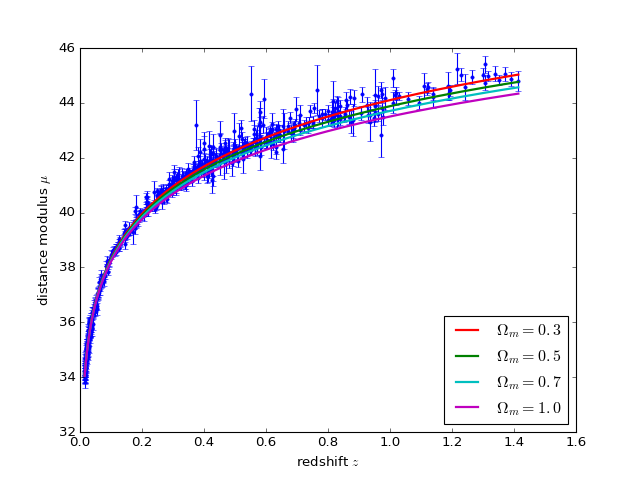

In [10]:
plt.close()

plt.errorbar(z,my,me,fmt='b.')

omega_m = 0.3
mu_try = vmu(z,omega_m)
plt.plot(z,mu_try,'r-',label='$\Omega_m=0.3$',linewidth=2)

omega_m = 0.5
mu_try = vmu(z,omega_m)
plt.plot(z,mu_try,'g-',label='$\Omega_m=0.5$',linewidth=2)

omega_m = 0.7
mu_try = vmu(z,omega_m)
plt.plot(z,mu_try,'c-',label='$\Omega_m=0.7$',linewidth=2)

omega_m = 1.0
mu_try = vmu(z,omega_m)
plt.plot(z,mu_try,'m-',label='$\Omega_m=1.0$',linewidth=2)

plt.legend(loc='lower right')
plt.xlim([0.0,1.6])
plt.xlabel('redshift $z$')
plt.ylabel('distance modulus $\mu$')
plt.show()

<IPython.core.display.Javascript object>


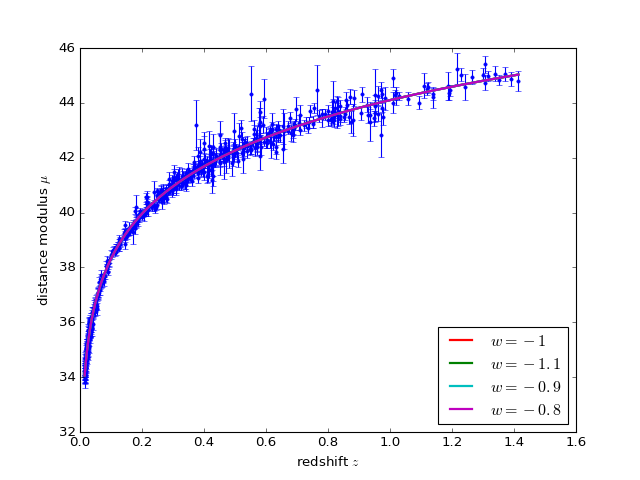

In [13]:
plt.close()

plt.errorbar(z,my,me,fmt='b.')

omega_m = 0.3
w=-1.0
mu_try = vmu(z,omega_m,w)
plt.plot(z,mu_try,'r-',label='$w=-1$',linewidth=2)

w=-1.1
mu_try = vmu(z,omega_m,w)
plt.plot(z,mu_try,'g-',label='$w=-1.1$',linewidth=2)

w=-0.9
mu_try = vmu(z,omega_m,w)
plt.plot(z,mu_try,'c-',label='$w=-0.9$',linewidth=2)

w=-0.8
mu_try = vmu(z,omega_m,w)
plt.plot(z,mu_try,'m-',label='$w=-0.8$',linewidth=2)

plt.legend(loc='lower right')
plt.xlim([0.0,1.6])
plt.xlabel('redshift $z$')
plt.ylabel('distance modulus $\mu$')
plt.show()

In [16]:
data1 = np.loadtxt('../data/supernovae.data')
z1 = data1[:,0]
my1 = data1[:,1]
me1 = data1[:,2]


data2 = np.loadtxt('../data/grbs.data')
z2 = data2[:,0]
my2 = data2[:,1]
me2 = data2[:,2]

In [17]:
z=np.append(z1,z2)
my=np.append(my1,my2)
me=np.append(me1,me2)

<IPython.core.display.Javascript object>


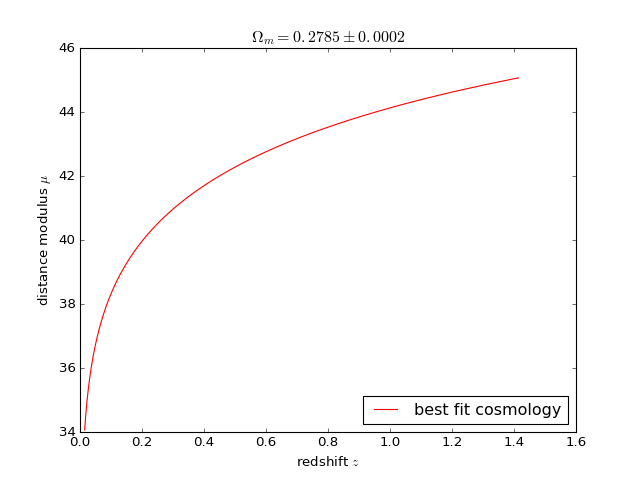

In [19]:
plt.close()

vmu = np.vectorize(mu)
guess = np.array([0.3])
omega_fit, covar = opt.curve_fit(vmu, z1, my1, guess, me1)

mu_fit = vmu(z1,omega_fit)
plt.plot(z1,mu_fit,'r-',label='best fit cosmology')

tstring = '$\Omega_m=%1.4f \pm %1.4f$' % (omega_fit[0], covar[0,0])
plt.title(tstring)

plt.xlabel('redshift $z$')
plt.ylabel('distance modulus $\mu$')

plt.legend(loc='lower right')
plt.show()

<IPython.core.display.Javascript object>


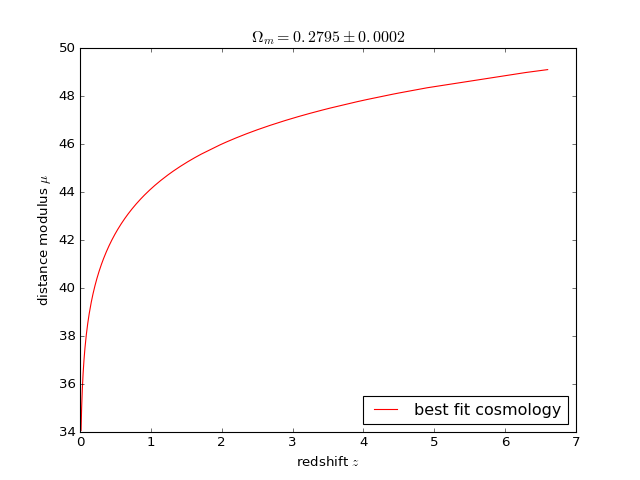

In [18]:
plt.close()

vmu = np.vectorize(mu)
guess = np.array([0.3])
omega_fit, covar = opt.curve_fit(vmu, z, my, guess, me)

mu_fit = vmu(z,omega_fit)
plt.plot(z,mu_fit,'r-',label='best fit cosmology')

tstring = '$\Omega_m=%1.4f \pm %1.4f$' % (omega_fit[0], covar[0,0])
plt.title(tstring)

plt.xlabel('redshift $z$')
plt.ylabel('distance modulus $\mu$')

plt.legend(loc='lower right')
plt.show()